# Bioinformática y Estadística II - IV Clasificación Automática 
## Mushroom Classification
### Varela Vega Alfredo 

In [20]:
import pandas 

# Reading the csv file 
df_mushroom = pandas.read_csv("data/mushrooms.csv")
print(df_mushroom)



     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

# Transforming letter labels to numeric labels for applying the models

In [32]:
from sklearn import preprocessing 

# Shortcut for calling the encoder 
le = preprocessing.LabelEncoder()

def transform_columns(category):
    '''
    desc: transform non numerical labels to numerical labels
    '''
    return le.fit_transform(category) 




for col in df_mushroom.columns:
    df_mushroom[col]= transform_columns(df_mushroom[col])
    
print(df_mushroom)

      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

# Spliting dataset into random train and test subsets

In [35]:
from sklearn.model_selection import train_test_split 

# Reading al categories but class from 1 to end
X= df_mushroom.drop(["class"],axis=1)
# Reading classes (edible vs poisonous)
y= df["class"] 

# Spliting dataset in training (70%) and evaluation (30%) using 0 as a seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Classifing by k-nearest neighbor 

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Setting the number of nearest neighbors 
k=1

# Classifier's definition
classifier = KNeighborsClassifier(n_neighbors=k)
# Training the classifier with training dataset and class values 
classifier.fit(X_train, y_train)
# Prediction of the evaluation dataset using trained classifier 
y_predict = classifier.predict(X_test) 
print(y_predict)



['p' 'e' 'e' ... 'p' 'p' 'p']


## Classifier evaluation 

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision:{}".format(precision_score(y_test, y_predict, average="macro" )))
print("recall:{}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score:{}".format(f1_score(y_test, y_predict, average="macro")))

Accuracy: 0.9991796554552912
Precision:0.9991438356164384
recall:0.9992138364779874
F-score:0.9991781599547482


In [41]:
from sklearn.metrics import classification_report

target_names= ["edible","poisonous"]
print(classification_report(y_test, y_predict,target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1272
   poisonous       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



[[1270    2]
 [   0 1166]]


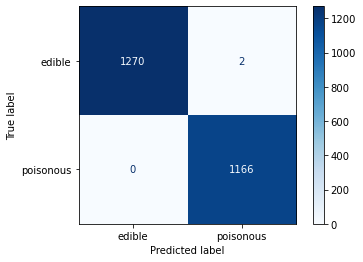

In [39]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix 

print(confusion_matrix(y_test, y_predict))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=["edible", "poisonous"])

# Classifing by Support Vector Machine

In [44]:
from sklearn.svm import SVC
# Classifier's Definiton 
svm_classifier= SVC(kernel="linear")
# Training classifier with training dataset and training values 
svm_classifier.fit(X_train, y_train)
# Classifier's prediction with evaluation dataset
y_predict= svm_classifier.predict(X_test)
print(y_predict)

['p' 'e' 'e' ... 'p' 'p' 'p']


## Classifier evaluation 

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy: {}".format(accuracy_score(y_test, y_predict)))
print("Preceision: {}".format(precision_score(y_test, y_predict, average="macro")))
print("Recall {}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score {}".format(f1_score(y_test, y_predict, average="macro")))


Accuracy: 0.9639048400328137
Preceision: 0.9641614906832299
Recall 0.9635506003430532
F-score 0.9638142271157167


In [47]:
from sklearn.metrics import classification_report 

# Setting class labels
target_names= ["edible","poisonous"]
print(classification_report(y_test, y_predict, target_names= target_names))


              precision    recall  f1-score   support

      edible       0.96      0.97      0.97      1272
   poisonous       0.97      0.96      0.96      1166

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



[[1236   36]
 [  52 1114]]


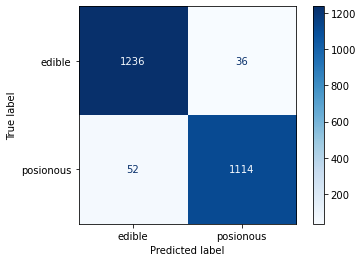

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_predict))
plot_confusion_matrix(svm_classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=["edible", "posionous"])